# Introduction
This notebook is a first part of [eargasm-spotify](https://github.com/adamsiemaszkiewicz/eargasm-music) repository meant to visualize data from the [eargasm music](https://open.spotify.com/user/eargasmusic?si=HtTLbkG6QoqkdKU3uTRjAQ) Spotify channel. 

# Set up environment

## Google Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Colab Notebooks/eargasm-music/

/content/gdrive/My Drive/Colab Notebooks/eargasm-music


In [3]:
!ls

all_playlists.csv   basic_info.csv		      files	    README.md
audio_analysis.csv  eargasm_data-retrieval.ipynb      final_df.csv
audio_features.csv  eargasm_data-visualisation.ipynb  genres.csv


## Import libraries and functions

## Install missing libraries

In [4]:
!pip install ipympl

In [5]:
!pip install squarify

### System

In [6]:
import timeit

### Notebook
https://ipywidgets.readthedocs.io/
https://kapernikov.com/ipywidgets-with-matplotlib/

In [7]:
from tqdm.notebook import tqdm # for progress bars
from ipywidgets import interact
import ipywidgets as widgets
from PIL import Image

### Data science

In [8]:
import pandas as pd # for data manipulation & analysis
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np # for linear algebra

### Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# import mplcursors # https://mplcursors.readthedocs.io/
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

### Word cloud

In [10]:
from wordcloud import WordCloud, STOPWORDS # https://github.com/amueller/word_cloud/blob/master/examples/masked.py
import squarify as sq

# Load data
Let's load the data fetched from the [Eargasm Music](https://open.spotify.com/user/eargasmusic?si=cz4VzEi1RgaUup_g8-UnEg) Spotify channel using `eargasm_retrieve-data.ipynb`. The data set consists of the tracks with their features as well as a playlist name label.

In [11]:
final_df = pd.read_csv('final_df.csv', index_col=0)

In [12]:
final_df.head()

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.351,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.713,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.676,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.303,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.548,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799


# Statistics

- juxtaposition i.e. popularity vs bmp
- main features of each playlist
- correlation heatmap
- mean values for feature of each palylist
- genre value count
- most/least mean of each playlist
- matrix of images of songs
- most popular artist
- each column mean min max
- most popular artist
- DODAĆ RELEASE DATE DO FEATURES

## Most popular artists

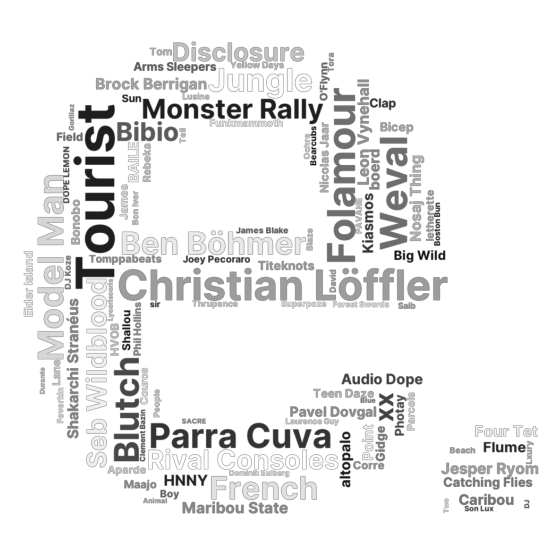

In [13]:
artists = final_df['track_artist'].values.tolist()
np.random.shuffle(artists)
artists_string = '\n'.join(artists)

eargasm_mask = np.array(Image.open('files/eargasm-mask.png'))
plt.figure(figsize=(10,10))
artists_wordcloud = WordCloud(
                              stopwords=STOPWORDS,
                              width=1024,
                              height=1024,
                              background_color=None,
                              mode='RGBA',
                              max_words=100,
                              min_font_size=5,
                              max_font_size=100,
                              scale=1,
                              random_state=999,
                              colormap='Greys',
                              mask=eargasm_mask,
                              font_path='files/Inter-Bold.otf',
                              prefer_horizontal=0.5
                              ).generate(artists_string)

plt.imshow(artists_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most popular genres

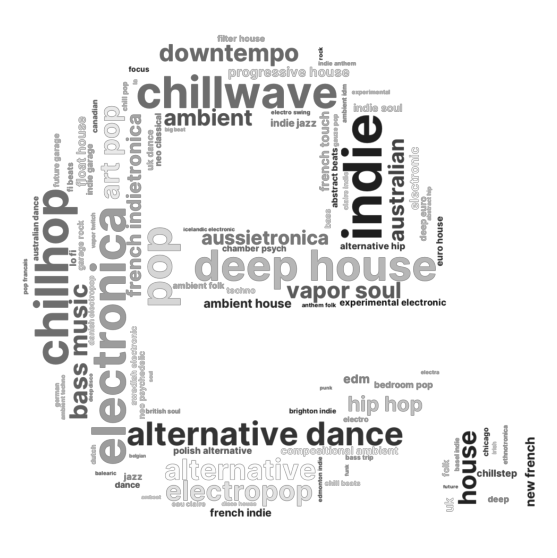

In [14]:
genres = final_df['track_genre'].dropna().values.tolist()
np.random.shuffle(genres)
genres_string = '\n'.join(genres)

eargasm_mask = np.array(Image.open('files/eargasm-mask.png'))
plt.figure(figsize=(10,10))
genres_wordcloud = WordCloud(
                              stopwords=STOPWORDS,
                              width=1024,
                              height=1024,
                              background_color=None,
                              mode='RGBA',
                              max_words=100,
                              min_font_size=5,
                              max_font_size=100,
                              scale=1,
                              random_state=999,
                              colormap='Greys',
                              mask=eargasm_mask,
                              font_path='files/Inter-Bold.otf',
                              prefer_horizontal=0.5
                              ).generate(genres_string)

plt.imshow(genres_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

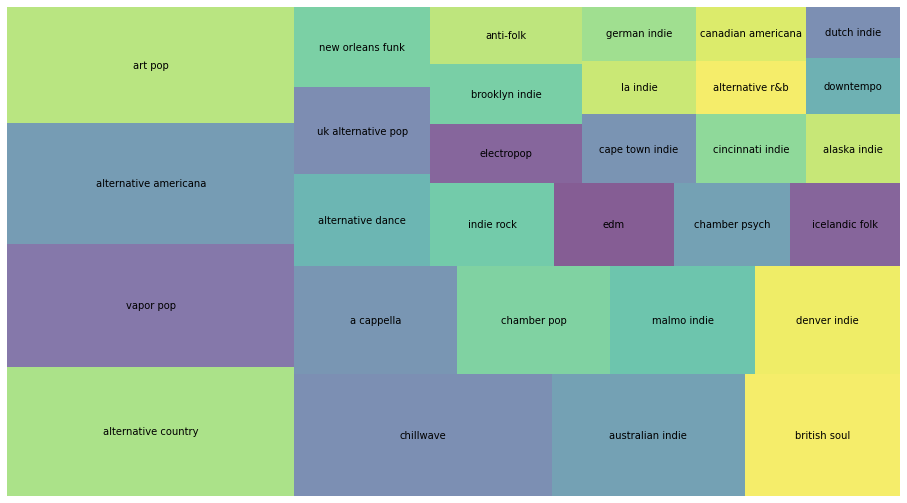

In [15]:
genre_count = final_df['track_genre'].dropna().value_counts()[:30]
plt.figure(figsize=(16,9))
sq.plot(sizes=genre_count,
        label=final_df['track_genre'].dropna().unique()[:30],
        alpha=.66,
        norm_x=10,
        norm_y=10)
plt.axis('off')
plt.show()

## Box graphs

## Popularity
input -> function -> graph

In [16]:
def single_playlist_df(playlist):
  df = final_df.loc[final_df['track_playlist'] == playlist]

  return df

In [17]:
 def popularity_plot(playlist_name):
   """
    Print the popularity of songs of a playlist.
   """

   df = single_playlist_df(playlist_name)
   
   sns.set_style('darkgrid')
   sns.displot(df,
               x='track_popularity',
               binwidth=5,
               color='orange',
               kde=True)
   plt.xlim(0, 100);
   plt.ylim(0, 50);
   plt.ylabel('Number of tracks');
   plt.xlabel('Popularity of a track');
   

In [18]:
most_popular = final_df[['track_id', 'track_artist', 'track_name', 'track_popularity', 'track_preview']]
most_popular = most_popular.sort_values(by=['track_popularity'],
                                        ascending=False)
most_popular.head()

,track_id,track_artist,track_name,track_popularity,track_preview
650,2hwOoMtWPtTSSn6WHV7Vp5,Mac Miller,Blue World,74,https://p.scdn.co/mp3-preview/3fe6ac844ff30952...
3404,0d6bZwEAi1XblGRhnzPfgC,Bon Iver,"Hey, Ma",70,https://p.scdn.co/mp3-preview/625ef5d640863ea2...
2900,1TuopWDIuDi1553081zvuU,Home,Resonance,70,https://p.scdn.co/mp3-preview/5b86600b6de2e612...
2901,1TuopWDIuDi1553081zvuU,Home,Resonance,70,https://p.scdn.co/mp3-preview/5b86600b6de2e612...
2079,41SwdQIX8Hy2u6fuEDgvWr,KAYTRANADA,10%,68,https://p.scdn.co/mp3-preview/8da5c5a803c7966d...


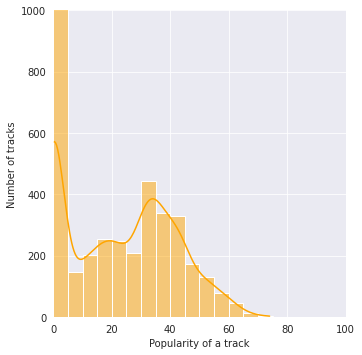

In [19]:
sns.set_style('darkgrid')
sns.displot(final_df,
            x='track_popularity',
            binwidth=5,
            color='orange',
            kde=True)
plt.xlim(0, 100);
plt.ylim(0, 1000);
plt.ylabel('Number of tracks');
plt.xlabel('Popularity of a track');

In [20]:
playlist_names = final_df['track_playlist'].unique()
widgets.interact(popularity_plot, playlist_name=playlist_names);

interactive(children=(Dropdown(description='playlist_name', options=('eargasm | breathe easy', "eargasm | kick…

## Audio features

In [21]:
audio_features_list = ['track_playlist',
                       'track_duration',
                       'track_popularity',
                       'track_releasedate',
                       'acousticness',
                       'danceability',
                       'energy',
                       'instrumentalness',
                       'liveness',
                       'speechiness',
                       'tempo',
                       'valence']
                       
features_df = final_df[audio_features_list]
features_df['track_playlist'] = features_df['track_playlist'].apply(lambda x: x.split(' | ')[1])





initial_data = [go.Box(
                       x = features_df['track_playlist'].where(features_df['track_playlist'] == name),
                       y = features_df['track_duration'].where(features_df['track_playlist'] == name),
                       notched=True,
                       showlegend=True,
                       name=name,
                       boxpoints='outliers',
                       
                     ) for name in features_df['track_playlist'].unique()]
                     

updatemenus = list([
    dict(
         buttons=list([
              dict(
                   label=feat,
                   method='update',
                   args=[{'y': [features_df[feat]]}, {'yaxis': dict(title=feat)}] 
                  ) for feat in audio_features_list[1:]
                      ]),
         direction='down',
         pad={"r": 10, "t": 10},
         showactive=True,
         x=0.1,
         xanchor="left",
         y=1.1,
         yanchor="top"
        )
    ])

legend = go.layout.Legend()

layout = go.Layout(
                   title=go.layout.Title(text="Box plots"),
                   height=800,
                   showlegend=True,
                   updatemenus=updatemenus,
                   xaxis=go.layout.XAxis(title='playlist name'),
                   yaxis=go.layout.YAxis(title='track_duration'),
                   legend=legend
                  )

fig = go.Figure(
                data=initial_data,
                layout=layout
               )


fig.show()

## Compare playlists

In [22]:
final_df.head()

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.351,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.713,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.676,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.303,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.548,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799


In [23]:
dfs = {}
for name in playlist_names:
  dfs[name] = single_playlist_df(name)

def make_traces(feature1, feature2, dfs):
  traces = []
  for name, df in dfs.items():
    name_stripped = name.split(' | ')[1]
    initial_playlists = ['curvatronik', 'kickin\' it ol\' skool', 'glide', 'weightless']
    if name_stripped in initial_playlists:
      traces.append(go.Scatter(x=df[feature1],
                              y=df[feature2],
                              mode='markers',
                              name=name_stripped,
                              text = df['track_artist'] + ' - ' + df['track_name']))
    else:
      traces.append(go.Scatter(x=df[feature1],
                              y=df[feature2],
                              mode='markers',
                              name=name_stripped,
                              visible='legendonly',
                              text = df['track_artist'] + ' - ' + df['track_name']))

  return traces


data = dict()

features = ['acousticness',
            'danceability',
            'energy',
            'instrumentalness',
            'liveness',
            'speechiness',
            'valence',
            'track_duration',
            'track_popularity',
            'key',
            'mode',
            'number_of_sections',
            'tempo',
            'time_signature']


for feat in features:
  data[feat] = [df[feat] for df in dfs.values()]

updatemenus = list([
    dict(x=-0.05,
         y=0.7,
         buttons=list([
              dict(
                   label=feat,
                   name='Feature 1',
                   method='update',
                   args=[{'x': data[feat]}, {'xaxis': dict(title=feat)}]
                   ) for feat in features
                      ])
        ),
    dict(x=-0.05,
         y=0.9,
         buttons=list([
              dict(
                   label=feat,
                   name='Feature 2',
                   method='update',
                   args=[{'y': data[feat]}, {'yaxis': dict(title = feat)}]
                   ) for feat in features
                      ])
        )
    ])


initial_data = make_traces('energy', 'instrumentalness', dfs)


annotations=[
             dict(text="Feature 1",
                  showarrow=False,
                  x=-0.16,
                  y=0.97,
                  yref='paper',
                  xref='paper',
                  align='left'),
             dict(text="Feature 2",
                  showarrow=False,
                  x=-0.16,
                  y=0.77,
                  yref='paper',
                  xref='paper',
                  align='left')
           ]

xaxis = go.layout.XAxis(title='energy')
yaxis = go.layout.YAxis(title='instrumentalness')

layout = go.Layout(
                   title=go.layout.Title(text='Comparison of feature pairs'),
                   height=750,
                   showlegend=True,
                   updatemenus=updatemenus,
                   annotations=annotations,
                   xaxis=xaxis,
                   yaxis=yaxis
                  )

fig = go.Figure(
                data=initial_data,
                layout=layout
               )


fig.show()

### Heatmap

In [24]:
audio_features_list = ['track_playlist',
                       'acousticness',
                       'danceability',
                       'energy',
                       'instrumentalness',
                       'liveness',
                       'speechiness',
                       'valence']
                       
features_df = final_df[audio_features_list]
features_df['track_playlist'] = features_df['track_playlist'].apply(lambda x: x.split(' | ')[1])

figure = go.Heatmap(
                    z=features_df[audio_features_list[1:]].corr(),
                    x=audio_features_list[1:],
                    y=audio_features_list[1:],
                    colorscale='Viridis',
                    zmax=1,
                    zmin=-1,
                    zmid=0
                   )
                      

layout = go.Layout(
                   title='Correlation heatmap',
                   width=860,
                   height=860
                  )

fig = go.Figure(
                data=figure,
                layout=layout
               )

fig.show()

### Radar charts

In [25]:
audio_features_list = ['track_playlist',
                       'acousticness',
                       'danceability',
                       'energy',
                       'instrumentalness',
                       'liveness',
                       'speechiness',
                       'valence']
                       
features_df = final_df[audio_features_list]
features_df['track_playlist'] = features_df['track_playlist'].apply(lambda x: x.split(' | ')[1])

# df = features_df.loc[features_df['track_playlist'] == playlist]

initial_playlists = ['sunny days', 'we up all night', 'sky gazing']
initial_data = []
for playlist in features_df['track_playlist'].unique():
  if playlist in initial_playlists:
    initial_data.append(
        go.Scatterpolar(
            r=[
               features_df.loc[features_df['track_playlist'] == playlist][feat].mean() for feat in audio_features_list[1:]
               ],
               theta=audio_features_list[1:],
               fill='toself',
               name=playlist
                       ))
  else: 
    initial_data.append(
        go.Scatterpolar(
            r=[
               features_df.loc[features_df['track_playlist'] == playlist][feat].mean() for feat in audio_features_list[1:]
               ],
               theta=audio_features_list[1:],
               fill='toself',
               name=playlist,
               visible='legendonly'
                       ))



# initial_data = [go.Scatterpolar(
#       r=[
#          features_df.loc[features_df['track_playlist'] == playlist][feat].mean() for feat in audio_features_list[1:]
#         ],
#       theta=audio_features_list[1:],
#       fill='toself',
#       name=playlist
# ) for playlist in features_df['track_playlist'].unique()]
                      

layout = go.Layout(
                   title='Radar charts',
                   width=860,
                   height=860,
                   polar=dict(
                       radialaxis=dict(
                           visible=True,
                           range=[0, 1]
                                      )
                             )
                  )


fig = go.Figure(
                data=initial_data,
                layout=layout
               )

fig.show()


# Single playlist analysis
- min-max & mean of each value
- average length
- image matrix
- average: duration, popularity, release date
- min/max: popularity
- most/least & most typical popular genre

1. min-max-avg track duration
2. min-max-avg track popularity
3. min-max-avg track release date
4. track image matrix
5. most popular genre/tag cloud
6. acousticness, danceability, energy, isntrumentalness, liveness, speechiness, valence
7. key, mode, tempo, time-signature, number of sections

# References

- https://github.com/tgel0/spotify-data
- https://www.kaggle.com/aeryan/spotify-music-analysis
- https://www.kaggle.com/arpita28/analysis-of-spotify-trends
- https://www.kaggle.com/jsongunsw/spotify-datasets
- https://www.kaggle.com/mohitkr05/spotify-data-visualization
- https://www.kaggle.com/karthiknc/spotify-visualisation-analysis
- https://www.kaggle.com/souhardyaganguly/spotify-svm
- https://www.kaggle.com/lowkimhoe/prediction-model-on-spotify-classification
- https://www.kaggle.com/pavansanagapati/birds-sounds-eda-spotify-urban-sound-eda
- https://www.kaggle.com/shadey/spotify
- https://medium.com/swlh/creating-waveforms-out-of-spotify-tracks-b22030dd442b
- https://vsupalov.com/analyze-spotify-music-library-with-jupyter-pandas/
- https://www.youtube.com/watch?v=v-9Mpe7NhkM
- http://harpolea.github.io/2018-05-09-spotipy
- https://medium.com/analytics-vidhya/music-genre-classification-with-python-51bff77adfd6
-https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
recommendations(seed_artists=None, seed_genres=None, seed_tracks=None, limit=20, country=None, **kwargs)

- http://harpolea.github.io/2018-05-09-spotipy
https://www.kaggle.com/thebrownviking20/intermediate-visualization-tutorial-using-plotly
- https://towardsdatascience.com/viz-your-music-with-spotify-api-and-plotly-eaa65f652191
- https://www.kaggle.com/duttasd28/spotify-theil-sen-cyberpunk-plotly-autoviz